In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb
sb.set()

# Data

This part involves where initial variables are listed and made ready to instantiate the simulation class

In [108]:
Visibility_Range = np.linspace(1, 60, 50)
lambda1 = 5.5e-7
lambda2 = 830e-9
lambda3 = 0.3e-5
consta = 3.19
solution_1 = []
solution_2 = []
solution_3 = []
solution_4 = []

# Optical Communication Block

This part present a class for the entire project with initial definitions in the constructor and methods representing Kruse, kim, Naboulsi and Machine Learning model. once an object of the class is instantiated, these methods can be called to execute the programme they host.


In [109]:
class OpticalFreeSpaceCommunication:
    
    def __init__(self, lambda_1, lambda_2, lambda_3, const, Visibility, solution_1, solution_2, solution_3, solution_4):
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.lambda_3 = lambda_3
        self.const = const
        self.Visibility = Visibility
        self.solution_1 = []
        self.solution_2 = []
        self.solution_3 = []
        self.solution_4 = []
        
    def KruseModel(self):
        for i in range(len(self.Visibility)):
            if (self.Visibility[i] > 0 and self.Visibility[i] <= 6):
                q = 0.585*self.Visibility[i]**(1/3)
            elif (self.Visibility[i] > 6 and self.Visibility[i] <= 50):
                q = 1.3
            elif (self.Visibility[i] > 50):
                q = 1.6
                
            attenuation = (self.const*(self.lambda_1/self.lambda_2)**q)/self.Visibility[i]
            self.solution_1.append(attenuation)
        plt.plot(self.Visibility, self.solution_1, c="r")
        plt.xlabel("Visibility")
        plt.ylabel("Attenuation")
        plt.title("Kruse Model")
        
    def KimModel(self):
        for i in range(len(self.Visibility)):
            if(self.Visibility[i] < 0.5):
                q = 0
            elif(self.Visibility[i]>0.5 and self.Visibility[i]<=5):
                q = self.Visibility[i] - 0.5
            elif(self.Visibility[i]>1 and self.Visibility[i]<=6):
                q = 0.16*self.Visibility[i]+0.34
            elif(self.Visibility[i]>6 and self.Visibility[i]<=50):
                q = 1.3
            elif(self.Visibility[i]>50):
                q = 1.6
            
            attenuation = (self.const*(self.lambda_1/self.lambda_2)**q)/self.Visibility[i]
            self.solution_2.append(attenuation)
        plt.plot(self.Visibility, self.solution_2, c="g")
        plt.xlabel("Visibility")
        plt.ylabel("Attenuation")
        plt.title("Kim Model")
            
        
    def Naboulsi(self):
        for i in range(len(self.Visibility)):
            attenuation = 10*np.log((0.18126*self.lambda_2**2 + 0.13709*self.lambda_2 + 3.7205)/self.Visibility[i])
            self.solution_3.append(attenuation)
        plt.plot(self.Visibility, self.solution_3, c="b")
        plt.xlabel("Visibility")
        plt.ylabel("Attenuation")
        plt.title("Naboulsi Model")
        
    def MachineLearningOptimization(self):
        for i in range(len(self.Visibility)):
            q = 0.5256*np.log(self.Visibility[i]) + 1.4323
            attenuation = (self.const*(self.lambda_1/self.lambda_3)**q)/self.Visibility[i]
            self.solution_4.append(attenuation)
        plt.plot(self.Visibility, self.solution_4, c="g")
        plt.xlabel("Visibility")
        plt.ylabel("Attenuation")
        plt.title("Machine Learning Model")
            

# Instantiating the an object of the class

In [110]:
OpticalChannel =  OpticalFreeSpaceCommunication(lambda1, lambda2, lambda3, consta, Visibility_Range, solution_1, solution_2, solution_3,solution_4)


# Calling methods of the class object

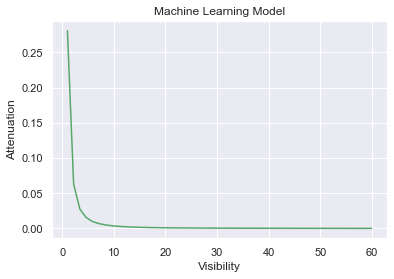

In [111]:
OpticalChannel.MachineLearningOptimization()

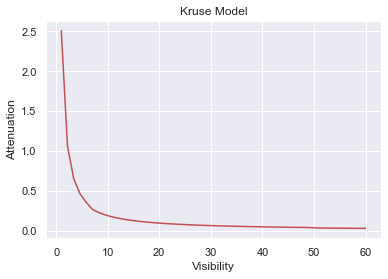

In [112]:
OpticalChannel.KruseModel()

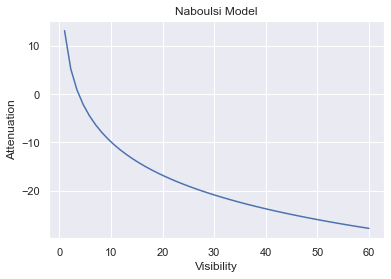

In [113]:
OpticalChannel.Naboulsi()

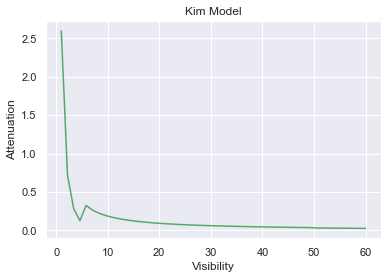

In [114]:
OpticalChannel.KimModel()